# Cluster Analysis

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from matplotlib import rcParams
import numpy as np

In [4]:
#reading the dataset
df = pd.read_csv('data\mohit_song_data.csv')
df.head(3)

,Unnamed: 0,artistName,trackName,msPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0,Kalandra,Slow Motion,319292,2022-05-11 00:59:00,0.713,0.734,0.0,-4.894,0.0,0.3250,0.548,0.0000,0.0687,0.8900,172.872,6ihObRBTB8xdSH2mlERtOX,4.0
1,1,Storm Corrosion,Storm Corrosion,505432,2022-05-11 01:07:00,0.303,0.175,9.0,-20.261,0.0,0.0357,0.832,0.8650,0.3440,0.0947,119.786,4h6cvOxiHOgNJRir4R0en2,4.0
2,2,ChrisNa Karast,SHIVA,389400,2022-05-11 01:14:00,0.653,0.849,2.0,-7.889,1.0,0.0308,0.100,0.0642,0.0619,0.4860,122.987,3L578QAFtaXYuRz0gmoVei,4.0


In [5]:
#dropping extra columns
df = df.drop(columns=['Unnamed: 0', 'datetime', 'id'])
df.head(3) 

,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Kalandra,Slow Motion,319292,0.713,0.734,0.0,-4.894,0.0,0.3250,0.548,0.0000,0.0687,0.8900,172.872,4.0
1,Storm Corrosion,Storm Corrosion,505432,0.303,0.175,9.0,-20.261,0.0,0.0357,0.832,0.8650,0.3440,0.0947,119.786,4.0
2,ChrisNa Karast,SHIVA,389400,0.653,0.849,2.0,-7.889,1.0,0.0308,0.100,0.0642,0.0619,0.4860,122.987,4.0


In [6]:
# taking required columns
x = df[['danceability', 'energy', 'loudness',	'speechiness',	'acousticness',	'instrumentalness',	'liveness',	'valence',	'tempo'	]]

## Standardizing the variables

In [8]:
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(x)

## Dimensionality Reduction

In [9]:
from sklearn.manifold import TSNE

In [10]:
X_tsne = TSNE(learning_rate=100).fit_transform(x_scaled)

In [11]:
rcParams['figure.figsize'] = 20,8
sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [12]:
data = pd.DataFrame({'d1': X_tsne[:, 0], 'd2': X_tsne[:, 1]})

## K-Means

In [13]:
from sklearn.cluster import KMeans

### Elbow Method

In [14]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

[295145.9999999964,
 238558.26649774262,
 205879.52938276067,
 185840.33423132653,
 167568.97358172724,
 154152.7266273393,
 142710.22951368126,
 133652.06746892497,
 127459.45031336871,
 121551.64394394912]

In [15]:
sns.lineplot(range(1,11), wcss)
plt.xlabel('No of labels')
plt.ylabel('WCSS')

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

### Clusters

In [16]:
kmeans_model = KMeans(6)
kmeans_model.fit(x_scaled)
data['kmeans']=kmeans_model.fit_predict(x_scaled)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

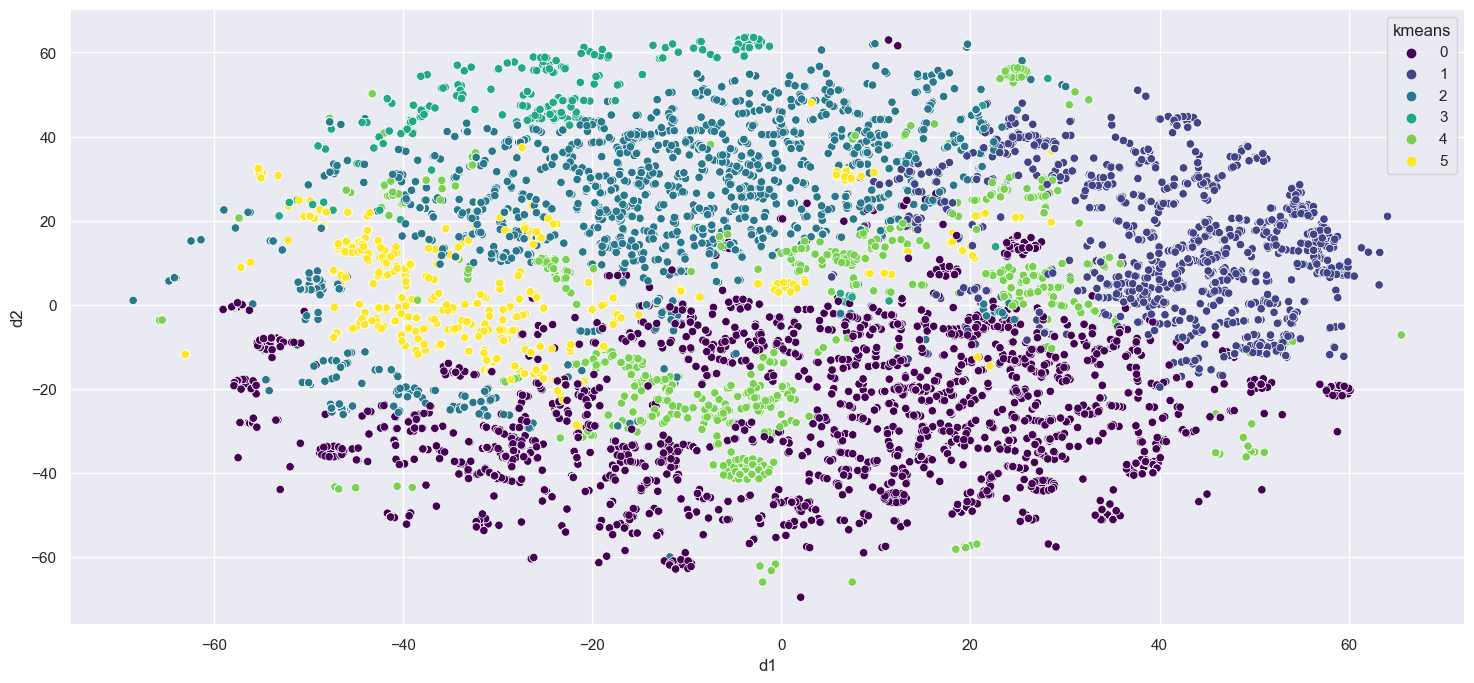

In [17]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='kmeans', palette='viridis')

## Agglomerative Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [19]:
model_agg = AgglomerativeClustering(n_clusters=6)
model_agg.fit(x_scaled)
data['agg']=model_agg.fit_predict(x_scaled)

<Axes: xlabel='d1', ylabel='d2'>

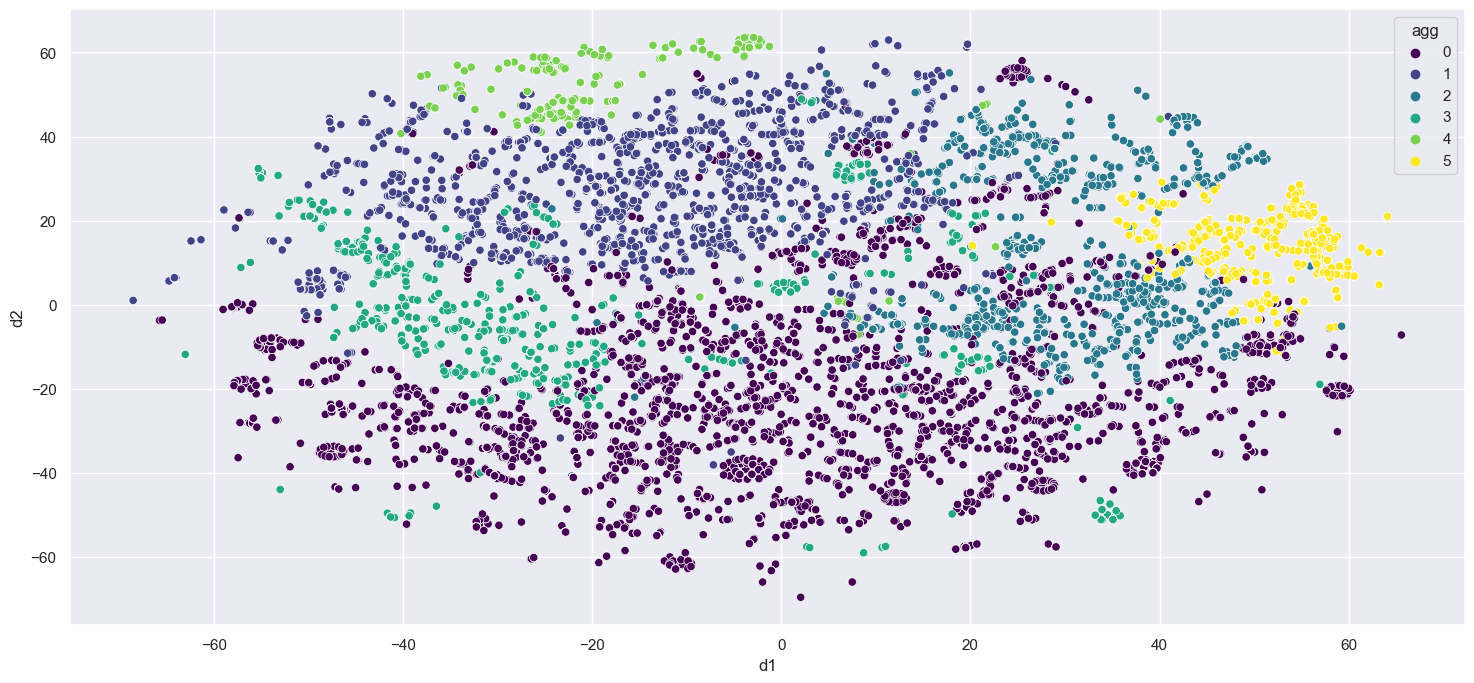

In [20]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='agg', palette='viridis')

## Affinity Propagation Clustering

In [21]:
from sklearn.cluster import AffinityPropagation

In [22]:
model_ap = AffinityPropagation(damping=0.9)
model_ap.fit(x_scaled)
data['ap'] = model_ap.predict(x_scaled)

MemoryError: Unable to allocate 8.01 GiB for an array with shape (1075413642,) and data type float64

In [23]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='ap', palette='viridis')

ValueError: Could not interpret value `ap` for parameter `hue`

## BIRCH

In [24]:
from sklearn.cluster import Birch

In [25]:
model_birch = Birch(threshold=0.01, n_clusters=4)
model_birch.fit(x_scaled)
data['birch'] = model_birch.predict(x)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Birch was fitted without feature names
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

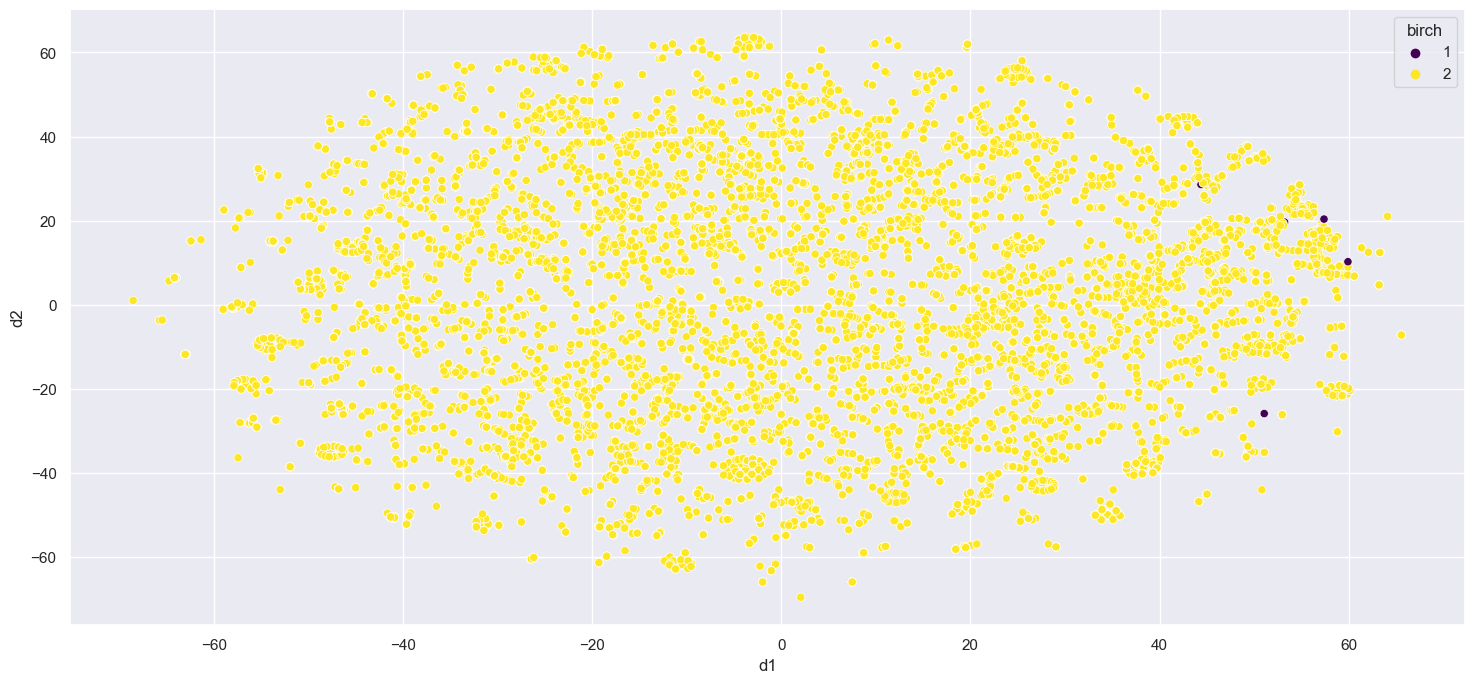

In [26]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='birch', palette='viridis')

Which ever cluster number I am providing this algorithm is making only 1 cluster. Hence this algorithm is not performing well for our dataset.

## DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
model_dbscan = DBSCAN(eps=0.30, min_samples=9)
data['dbscan'] = model_dbscan.fit_predict(x)

<Axes: xlabel='d1', ylabel='d2'>

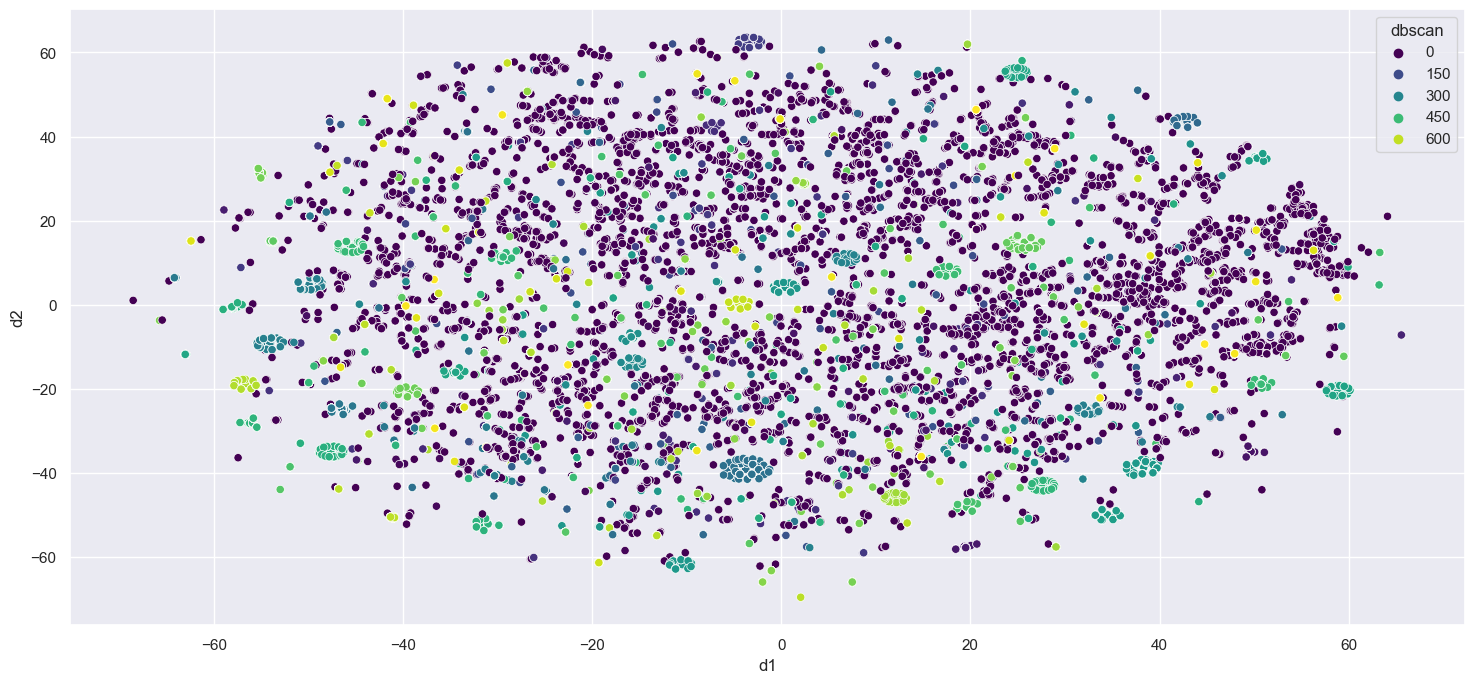

In [29]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='dbscan', palette='viridis')

In [47]:
model_dbscan

DBSCAN(eps=0.3, min_samples=9)

## Mini-Batch Kmeans

In [35]:
from sklearn.cluster import MiniBatchKMeans

In [36]:
model_minibatch_kmeans = MiniBatchKMeans(n_clusters=6)
model_minibatch_kmeans.fit(x_scaled)
data['minibatch_kmeans'] = model_minibatch_kmeans.predict(x)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but MiniBatchKMeans was fitted without feature names
  warnings.warn(


<Axes: xlabel='d1', ylabel='d2'>

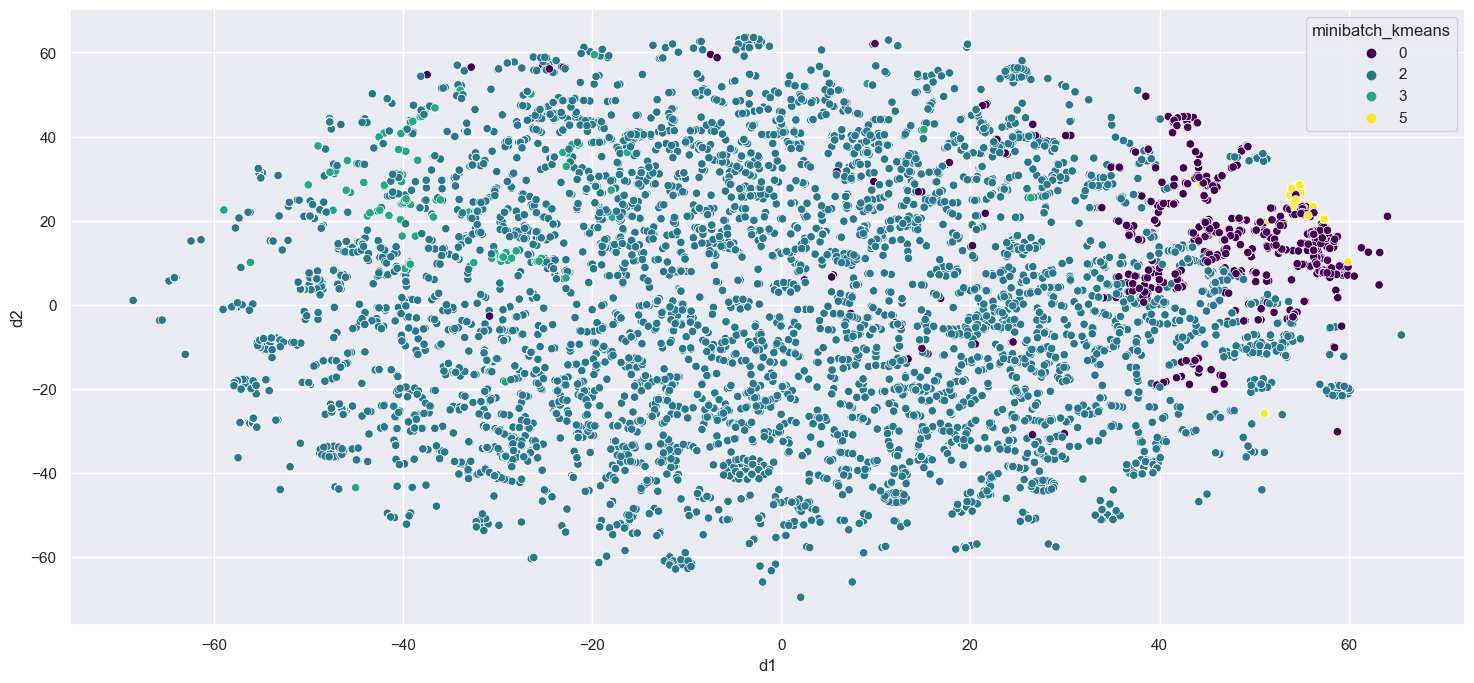

In [37]:
rcParams['figure.figsize'] = 18,8
sns.scatterplot(data=data, x='d1', y='d2', hue='minibatch_kmeans', palette='viridis')

In [38]:
x= x.join(data['agg'])
x.head(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,agg
0,0.713,0.734,-4.894,0.3250,0.548,0.0000,0.0687,0.8900,172.872,4
1,0.303,0.175,-20.261,0.0357,0.832,0.8650,0.3440,0.0947,119.786,5
2,0.653,0.849,-7.889,0.0308,0.100,0.0642,0.0619,0.4860,122.987,1


In [39]:
average = x.groupby('agg').mean().reset_index()
average

,agg,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0,0.617095,0.628572,-10.105499,0.050028,0.121374,0.720554,0.115439,0.243065,129.617410
1,1,0.616962,0.705070,-7.043648,0.068307,0.153407,0.054071,0.152207,0.468698,120.809098
2,2,0.596199,0.406707,-12.532426,0.051663,0.651220,0.476328,0.130778,0.272338,107.543006
3,3,0.613087,0.685320,-9.367960,0.060553,0.089027,0.567858,0.477585,0.298790,115.865531
4,4,0.724191,0.612203,-8.992305,0.319850,0.329064,0.191329,0.144858,0.413408,104.444453
5,5,0.246539,0.150046,-23.286761,0.043080,0.850551,0.802105,0.150455,0.089965,102.795454


In [40]:
df = df.join(data['agg'])

In [46]:
df

,artistName,trackName,msPlayed,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,agg
0,Kalandra,Slow Motion,319292,0.7130,0.734,0.0,-4.894,0.0,0.3250,0.54800,0.000000,0.0687,0.8900,172.872,4.0,4
1,Storm Corrosion,Storm Corrosion,505432,0.3030,0.175,9.0,-20.261,0.0,0.0357,0.83200,0.865000,0.3440,0.0947,119.786,4.0,5
2,ChrisNa Karast,SHIVA,389400,0.6530,0.849,2.0,-7.889,1.0,0.0308,0.10000,0.064200,0.0619,0.4860,122.987,4.0,1
3,William Orbit,Water From A Vine Leaf,425000,0.6000,0.532,1.0,-19.603,0.0,0.0387,0.01830,0.910000,0.0574,0.0867,101.612,4.0,0
4,Matt Lange,"Slow, in Ashes",312000,0.7240,0.604,1.0,-10.686,1.0,0.0485,0.15800,0.667000,0.0725,0.2740,110.034,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32789,The Bhaktas,Hare Krishna (feat. Krishna Das & Jai Uttal),595200,0.4770,0.425,0.0,-13.631,1.0,0.0371,0.72500,0.006560,0.4840,0.1190,109.914,4.0,2
32790,The Bhaktas,Gayatri Mantra,549600,0.4240,0.448,9.0,-12.682,0.0,0.0752,0.85600,0.000019,0.1120,0.2380,81.979,1.0,2
32791,Sariel Orenda,Ganapataye,404878,0.6220,0.670,10.0,-13.833,1.0,0.0576,0.00236,0.491000,0.0422,0.2740,172.007,4.0,0
32792,The Bhaktas,Cosmic Mantra,541500,0.0855,0.338,0.0,-12.509,1.0,0.0341,0.61800,0.965000,0.1090,0.0289,85.139,3.0,0


### Cluster Profile

### Cluster 0

**Features**

danceability | energy
--- | ---
0.59	| 0.72

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.13	| 0.002

loudness | liveness
--- | ---
-5.36 | 0.14

valence	| tempo
--- | ---
0.39 | 124.5

**Description**  
As per the features, cluster 0 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

Few of the songs in this cluster are as follows:


In [41]:
cluster_0 = df.loc[ df['agg'] == 0, ['artistName', 'trackName']]
cluster_0.sample(5)

,artistName,trackName
20681,Aled Mann,Hope
6710,Liquid Bloom,Roots Of The Earth - Mose Remix
14248,Multani,Madira
10193,Rafael Cerato,Like Gilles Said - Ben Böhmer Remix
10122,JaguarTree,Etherea


### Cluster 1

**Features**

danceability | energy
--- | ---
0.63	| 0.68

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.05	| 0.18	| 0.65

loudness | liveness
--- | ---
-8.39 | 0.14

valence	| tempo
--- | ---
0.36 | 122.5

**Description**  
As per the features, cluster 1 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and speechiness. Moreover, these songs have a little sad and gloomy lyrics. *(Beats + Gloomy)*

However, the only difference with cluster 0 is the instrumentalness. Along with beats and energy the song have lot of instrument sounds.

Few of the songs in this cluster are as follows:


In [42]:
cluster_1 = df.loc[ df['agg'] == 1, ['artistName', 'trackName']]
cluster_1.sample(5)

,artistName,trackName
1042,FKJ,Greener
27544,Jan Blomqvist,High On Beat - Sofi Tukker Remix
1340,Thaikkudam Bridge,Thekkini - Namah
9963,Andara,Om Pra Mah
9542,3 Doors Down,Kryptonite


### Cluster 2

**Features**


danceability | energy
--- | ---
0.74	| 0.70

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.06	| 0.16	| 0.001

loudness | liveness
--- | ---
-5.46 | 0.12

valence	| tempo
--- | ---
0.68 | 116.09

**Description**  
As per the features, cluster 2 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have a happy lyrics. *(Beats + haapy)*

Few of the songs in this cluster are as follows:


In [35]:
cluster_2 = df.loc[ df['agg'] == 2, ['artistName', 'trackName']]
cluster_2.sample(5)

,artistName,trackName
1847,VINAI,Rise Up (feat. Vamero)
964,Lewis Capaldi,Bruises - Steve Void Remix
960,Tiësto,God Is A Dancer (with Mabel)
761,Borgeous,Someone Save Me
291,Cher Lloyd,Want U Back


### Cluster 3

**Features**


danceability | energy
--- | ---
0.69	| 0.70

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.26	| 0.19	| 0.003

loudness | liveness
--- | ---
-6.06 | 0.13

valence	| tempo
--- | ---
0.55 | 127.86

**Description**  
As per the features, cluster 3 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have lyrics which are neutral. *(Beats + neutral)*

Few of the songs in this cluster are as follows:


In [43]:
cluster_3 = df.loc[ df['agg'] == 3, ['artistName', 'trackName']]
cluster_3.sample(5)

,artistName,trackName
1201,Midival Punditz,Rootha Yaar - Komorebi Remix
15926,U108,Sharanam Ganesha
17337,Mose,Shante Ishta
2794,Shanti People,Krishna Keshava
17322,Akriza,Umoja


### Cluster 4

**Features**


danceability | energy
--- | ---
0.67	| 0.75

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.07	| 0.12	| 0.002

loudness | liveness
--- | ---
-5.15 | 0.36

valence	| tempo
--- | ---
0.54 | 115.85

**Description**  
As per the features, cluster 4 contains energetic songs with more of beats (mediocre beats/minute) and less of acouticness and instrumentalness. Moreover, these songs have neutral lyrics. *(Beats + haapy)*

Few of the songs in this cluster are as follows:


In [44]:
cluster_4 = df.loc[ df['agg'] == 4, ['artistName', 'trackName']]
cluster_4.sample(5)

,artistName,trackName
236,D-Cypher,Aamchi Mumbai
20358,Jon Hopkins,Campfire
21259,Dhruv Visvanath,Drop
3183,FKJ,Losing My Way
20383,FKJ,Losing My Way


### Cluster 5

**Features**


danceability | energy
--- | ---
0.54	| 0.36

speechiness |	acousticness | instrumentalness
--- | --- | ---
0.04	| 0.72	| 0.007

loudness | liveness
--- | ---
-9.25 | 0.12

valence	| tempo
--- | ---
0.35 | 107.99

**Description**  
As per the features, cluster 5 contains low energetic songs with less  of beats and more of acouticness and instrumentalness. Moreover, these songs have a sad lyrics. *(Acoustic + sad)*

Few of the songs in this cluster are as follows:


In [45]:
cluster_5 = df.loc[ df['agg'] == 5, ['artistName', 'trackName']]
cluster_5.sample(5)

,artistName,trackName
18887,Poranguí,Eternal Horizons
30626,Tyler Bates,Sacré-Coeur Sunrise
15520,Rannar Sillard,Empyrean Sun
1797,Sattyananda,Sonic Dreams
17697,Miesha Berens,Dreaminess
